In [18]:
import pandas as pd

In [19]:
df = pd.read_csv("data1.csv")

In [20]:
df.head(10)

,labels,news,authors
0,Coronavirus,"Daily Discussion Post - April 19 | Questions, ...",AutoModerator
1,Coronavirus,Scientific Studies Looking For Participants,DNAhelicase
2,Coronavirus,Kentucky reports highest coronavirus infection...,Canuknucklehead
3,Coronavirus,The Danish parliament passes a vote that compa...,Socialismen
4,Coronavirus,Coronavirus stay at home order saves state tax...,paul1032xx
5,Coronavirus,Sea turtles are finally thriving now that peop...,2RoamRome
6,Coronavirus,Japan is offering sex workers financial aid to...,Nihilist911
7,Coronavirus,Coronavirus Has Now Killed More People in US t...,ma582
8,Coronavirus,Boston Globe prints 15 pages of obituaries in ...,joecam
9,Coronavirus,Michigan mayor calls on commissioner who joine...,Zhana-Aul


In [21]:
#script to find length of news in terms of word to know whether we can extract it as feature or not
    #if distribution of len of words  vs label is same then we wont use it as a feature
len_of_news = []
for news in df["news"]:   
    len_of_news.append(len(str(news).split(" ")))
df0 = pd.DataFrame(len_of_news)
df = pd.concat([df,df0],axis=1)
df.columns =["lebel","news","authors","len"]
df


,lebel,news,authors,len
0,Coronavirus,"Daily Discussion Post - April 19 | Questions, ...",AutoModerator,15
1,Coronavirus,Scientific Studies Looking For Participants,DNAhelicase,5
2,Coronavirus,Kentucky reports highest coronavirus infection...,Canuknucklehead,14
3,Coronavirus,The Danish parliament passes a vote that compa...,Socialismen,31
4,Coronavirus,Coronavirus stay at home order saves state tax...,paul1032xx,16
...,...,...,...,...
4575,IndianCinema,"This week in movies - Oct 22, 2015",that_70_show_fan,8
4576,IndianCinema,My brief dissection of the movie Govindudu And...,that_70_show_fan,18
4577,IndianCinema,Is this sub already dead? Any plans/strategies...,that_70_show_fan,13
4578,IndianCinema,[Article]How is a Film Certified by the Censor...,that_70_show_fan,10


In [22]:
len(df)

4580

In [23]:
#altough i extracted for each individual topics there is a posibility that same different flares are mentioned for each topic
#we need to get rid of duplicates
df.sort_values('news',inplace = True,ascending = False)
duplicate = df.duplicated('news',keep=False)

In [24]:
len(duplicate[duplicate==True])  #so here we can see we got 14 duplicates so we need to get rid of them

26

In [25]:
df = df[~duplicate] #removing duplicates

In [26]:
len(df) #here we can see how length of duplicates got reduced

4554

In [27]:
#now lets check for missing values
df.isna().sum()  #here we can see there is no missing values

#we can see also see that authors there are only 125 unique authors thus 
#author will be the on of the main feature in predicting label for our class

lebel        0
news         0
authors    125
len          0
dtype: int64

In [28]:
print("total no of unique news label :",df["lebel"].nunique() )
print("total no of unique news  :",df["news"].nunique() )


total no of unique news label : 9
total no of unique news  : 4554


In [29]:
import matplotlib.pyplot as plt

In [30]:
df["lebel"].unique()

array(['IndiaNonPolitical', 'Coronavirus', 'IndianCinema',
       'indianstartups', 'indiascience', 'indianeconomy', 'rajneeti',
       'IndianFood', 'indiansports'], dtype=object)

In [31]:
df

,lebel,news,authors,len
879,IndiaNonPolitical,🪔,dhisum_dhisum,1
1635,IndiaNonPolitical,😍,Kaptaaan,1
1560,IndiaNonPolitical,“Tussi Na Jao!” How Do You Convince Indian Par...,Ajaatshatru34,14
389,Coronavirus,"“One Piece"" & “Digimon Adventure (2020)"" anime...",DemiFiendRSA,14
4081,IndianCinema,“Masterpiece”…An underwhelming masala film bar...,crazieab,10
...,...,...,...,...
1021,IndiaNonPolitical,"""My parents do not even know what exam I have ...",gary2812,24
3089,IndianFood,"""Breath Fresheners"" at Indian restaurants - wh...",ishikiera,16
3627,IndianCinema,"""Bollywood"" the INDIAN cinema",akshayrana1998,4
1037,IndiaNonPolitical,"""Blockchain Technology Center of Excellence"" I...",Askrypto,8


In [32]:
l_of_news =[]
l_of_label=[]
for label in df["lebel"]:
    l_of_label.append(label)
    
for x in df["len"]:
    l_of_news.append(x)

In [33]:
l_of_news

[1,
 1,
 14,
 14,
 10,
 9,
 9,
 2,
 9,
 9,
 19,
 21,
 12,
 12,
 11,
 13,
 11,
 33,
 13,
 9,
 14,
 19,
 37,
 14,
 14,
 23,
 6,
 6,
 14,
 17,
 18,
 12,
 14,
 18,
 10,
 10,
 7,
 7,
 4,
 8,
 8,
 6,
 11,
 1,
 5,
 2,
 9,
 5,
 8,
 18,
 4,
 9,
 10,
 11,
 3,
 3,
 15,
 2,
 9,
 16,
 14,
 8,
 13,
 4,
 4,
 8,
 32,
 7,
 3,
 6,
 18,
 1,
 8,
 2,
 19,
 10,
 2,
 9,
 3,
 8,
 32,
 4,
 6,
 30,
 16,
 7,
 16,
 26,
 9,
 26,
 11,
 5,
 10,
 10,
 7,
 24,
 12,
 25,
 15,
 19,
 19,
 23,
 11,
 13,
 13,
 13,
 8,
 9,
 8,
 10,
 11,
 1,
 10,
 11,
 11,
 30,
 6,
 10,
 6,
 5,
 6,
 16,
 5,
 10,
 7,
 11,
 7,
 7,
 3,
 4,
 11,
 4,
 16,
 14,
 3,
 6,
 9,
 9,
 7,
 13,
 7,
 16,
 12,
 8,
 5,
 5,
 16,
 6,
 13,
 9,
 16,
 10,
 9,
 10,
 10,
 10,
 28,
 15,
 16,
 11,
 13,
 13,
 8,
 11,
 11,
 8,
 16,
 11,
 6,
 7,
 16,
 14,
 10,
 1,
 13,
 16,
 10,
 20,
 12,
 15,
 20,
 25,
 9,
 11,
 16,
 11,
 8,
 8,
 11,
 9,
 9,
 5,
 10,
 10,
 9,
 10,
 11,
 7,
 14,
 11,
 8,
 7,
 6,
 8,
 11,
 10,
 5,
 28,
 12,
 14,
 7,
 26,
 7,
 9,
 16,
 10,
 14,
 15,
 8,
 8

In [34]:
x_axis=[]
for label in df["lebel"].unique():
    x = []
    for i in range(len(l_of_label)):
        if l_of_label[i]==label:
            
            x.append(l_of_news[i]);
    x_axis.append(x)

In [35]:
x_axis

[[1,
  1,
  14,
  17,
  4,
  8,
  8,
  6,
  1,
  9,
  14,
  4,
  32,
  5,
  7,
  19,
  10,
  11,
  30,
  6,
  5,
  6,
  7,
  16,
  28,
  14,
  10,
  1,
  9,
  11,
  8,
  28,
  14,
  8,
  10,
  8,
  5,
  6,
  5,
  1,
  4,
  5,
  28,
  8,
  13,
  13,
  17,
  9,
  9,
  16,
  38,
  8,
  5,
  7,
  6,
  3,
  13,
  6,
  18,
  9,
  8,
  11,
  12,
  6,
  9,
  6,
  13,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  6,
  8,
  11,
  10,
  8,
  11,
  5,
  11,

In [36]:
unique =[]
for i in df["lebel"].unique():
    unique.append(i)

Text(0, 0.5, 'frequency')

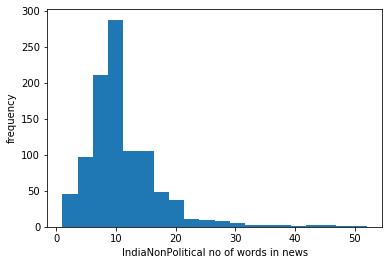

In [37]:
plt.hist(x_axis[0],bins=20)
plt.xlabel(unique[0]+" no of words in news")
plt.ylabel("frequency")  #here from graph we can see that most no of words in indian political  news is 10

Text(0, 0.5, 'frequency')

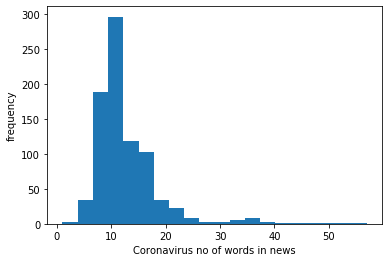

In [38]:
plt.hist(x_axis[1],bins=20)
plt.xlabel(unique[1]+" no of words in news")
plt.ylabel("frequency") #here from graph we can see that most no of words in indian startups  news is 10

Text(0, 0.5, 'frequency')

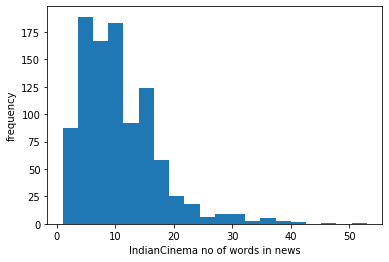

In [39]:
plt.hist(x_axis[2],bins=20)
plt.xlabel(unique[2]+" no of words in news")
plt.ylabel("frequency") #here from graph we can see that most no of words in coronavirus news is 10

Text(0, 0.5, 'frequency')

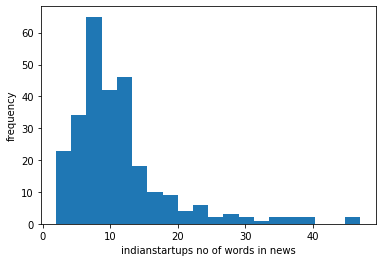

In [40]:
plt.hist(x_axis[3],bins=20)
plt.xlabel(unique[3]+" no of words in news")
plt.ylabel("frequency") #here from graph we can see that most no of words in indian science  news is 10

Text(0, 0.5, 'frequency')

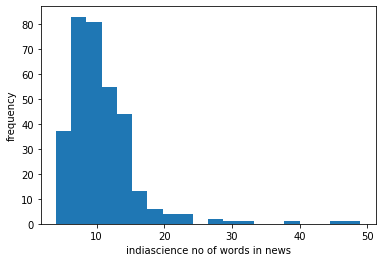

In [41]:
plt.hist(x_axis[4],bins=20)
plt.xlabel(unique[4]+" no of words in news")
plt.ylabel("frequency")   #here from graph we can see that most no of words in indian economy  news is 10

Text(0, 0.5, 'frequency')

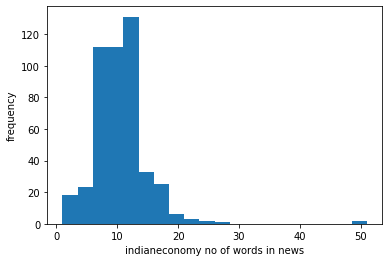

In [42]:
plt.hist(x_axis[5],bins=20)
plt.xlabel(unique[5]+" no of words in news")
plt.ylabel("frequency")     #here from graph we can see that most no of words in rajneeti  news is 7

Text(0, 0.5, 'frequency')

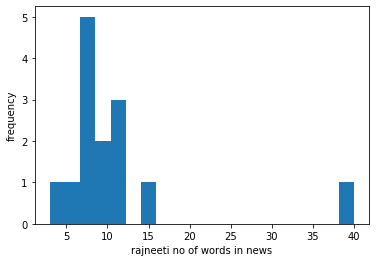

In [43]:
plt.hist(x_axis[6],bins=20)
plt.xlabel(unique[6]+" no of words in news")
plt.ylabel("frequency") #here from graph we can see that most no of words in indian political  news is 9

Text(0, 0.5, 'frequency')

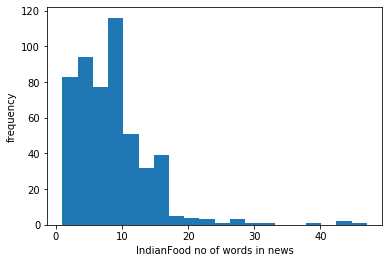

In [44]:
plt.hist(x_axis[7],bins=20)
plt.xlabel(unique[7]+" no of words in news")
plt.ylabel("frequency")   #here from graph we can see that most no of words in indian sports  news is 9

In [45]:
#from above graphs we can see that the distribution of no of words is almost same so we wont extract it as a feature

In [46]:
df.to_csv(r'C:\Users\pc\intern\data1.csv',index=False)